In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as scps

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (9, 6)

## Covariance

$$Cov(X,Y) = \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$$

In [6]:
def covariance(X):
    X = X - X.mean(axis=0)
    X = (X.T @ X) / (len(X)-1)
    return X

In [35]:
x = np.random.normal(loc=5, scale=2, size=1000)
y = np.random.normal(loc=0, scale=7, size=1000)
X = np.vstack((x, y)).T

array([[  6.29843078, -15.96056386],
       [  4.70922375,   3.78309002],
       [  4.42780671, -10.69598329],
       ...,
       [  5.6932577 ,   0.83918505],
       [  4.46508095,  -2.19040124],
       [  7.31158917, -10.22512104]])

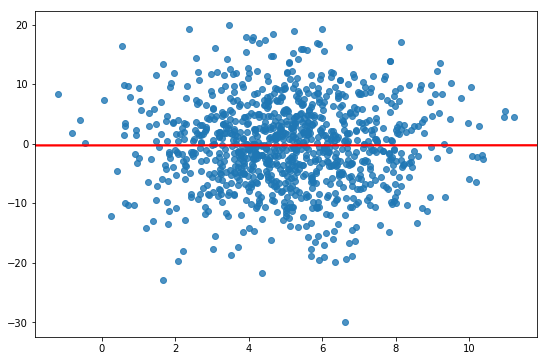

In [37]:
sns.regplot(X[:,0], X[:,1], ci=None, line_kws={'color':'red'})

In [47]:
print('covariance matrix from numpy\n')
print(np.cov(X, rowvar=False))
print('\n=================================\n')
print('Our covariance matrix\n')
print(covariance(X))

covariance matrix from numpy

[[3.89450220e+00 5.98976798e-03]
 [5.98976798e-03 5.30324728e+01]]


Our covariance matrix

[[3.89450220e+00 5.98976798e-03]
 [5.98976798e-03 5.30324728e+01]]


## Correlation

$$Corr(X,Y) = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

In [8]:
def correlation(X):
    cov = covariance(X)
    std = X.std(axis=0, ddof=1).reshape(-1, 1) @ X.std(axis=0, ddof=1).reshape(1, -1)
    
    return cov / std

In [9]:
corr = correlation(X)
corr

array([[ 1.00000000e+00, -6.38660084e-04],
       [-6.38660084e-04,  1.00000000e+00]])

In [10]:
np.corrcoef(X, rowvar=False)

array([[ 1.00000000e+00, -6.38660084e-04],
       [-6.38660084e-04,  1.00000000e+00]])

In [16]:
x = np.linspace(1, 5, 500)
y = 2 * x + np.random.normal(scale=2, size=500)

X = np.vstack((x,y)).T

Text(0.5, 1.0, 'Generated data')

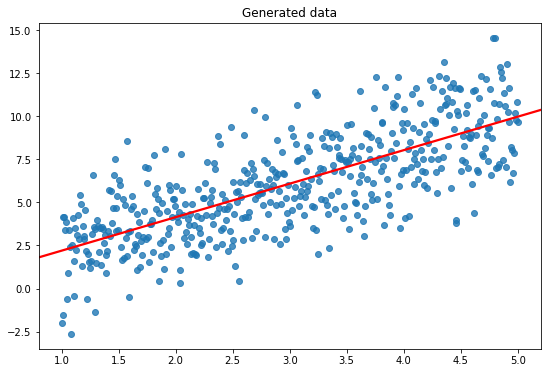

In [20]:
sns.regplot(X[:,0], X[:,1], ci=None, line_kws={'color':'red'})
plt.title('Generated data')

In [21]:
correlation(X)

array([[1.        , 0.74193419],
       [0.74193419, 1.        ]])